In [1]:
#notebook dataset1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
data_path = "../../ressources/contaminated_data.csv"
data = pd.read_csv(data_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   uId                  3955 non-null   object
 1   pmcId                3955 non-null   int64 
 2   licenseType          3955 non-null   object
 3   articleDate          3955 non-null   object
 4   articleType          3955 non-null   object
 5   publisher            3955 non-null   object
 6   specialty            3955 non-null   object
 7   language             3955 non-null   object
 8   abstract_COMPARISON  2757 non-null   object
 9   abstract_INDICATION  3865 non-null   object
 10  abstract_FINDINGS    3425 non-null   object
 11  abstract_IMPRESSION  3921 non-null   object
 12  authors              3955 non-null   object
 13  mesh_major           3955 non-null   object
dtypes: int64(1), object(13)
memory usage: 432.7+ KB


In [4]:
columns_to_remove = ["specialty","pmcId","licenseType","articleDate","articleType","publisher","language","authors","abstract_COMPARISON","uId","mesh_major","abstract_INDICATION"]
data = data.drop(columns=columns_to_remove)
print("Données après suppression des colonnes :")
data.info()

Données après suppression des colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   abstract_FINDINGS    3425 non-null   object
 1   abstract_IMPRESSION  3921 non-null   object
dtypes: object(2)
memory usage: 61.9+ KB


In [5]:
data.shape

(3955, 2)

In [6]:
data.head()

,abstract_FINDINGS,abstract_IMPRESSION
0,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,The cardiomediastinal silhouette is within nor...,No acute cardiopulmonary process.
2,Both lungs are clear and expanded. Heart and m...,No active disease.
3,There is XXXX increased opacity within the rig...,1. Increased opacity in the right upper lobe w...
4,Interstitial markings are diffusely prominent ...,Diffuse fibrosis. No visible focal acute disease.


In [7]:
missing_values = data.isnull().sum()
print(missing_values)

abstract_FINDINGS      530
abstract_IMPRESSION     34
dtype: int64


In [8]:
data = data.dropna(subset=['abstract_FINDINGS','abstract_IMPRESSION'])

In [9]:
print("\n ** Nombre de doublons avant supppression **:",data.duplicated().sum())


 ** Nombre de doublons avant supppression **: 707


In [10]:
data.shape

(3419, 2)

In [11]:
data.dtypes

abstract_FINDINGS      object
abstract_IMPRESSION    object
dtype: object

In [12]:
data.abstract_IMPRESSION.describe()

count                                      3419
unique                                     1402
top       No acute cardiopulmonary abnormality.
freq                                        302
Name: abstract_IMPRESSION, dtype: object

In [13]:
data.abstract_FINDINGS.describe()

count                                                  3419
unique                                                 2627
top       The heart and lungs have XXXX XXXX in the inte...
freq                                                     53
Name: abstract_FINDINGS, dtype: object

<Axes: xlabel='abstract_FINDINGS'>

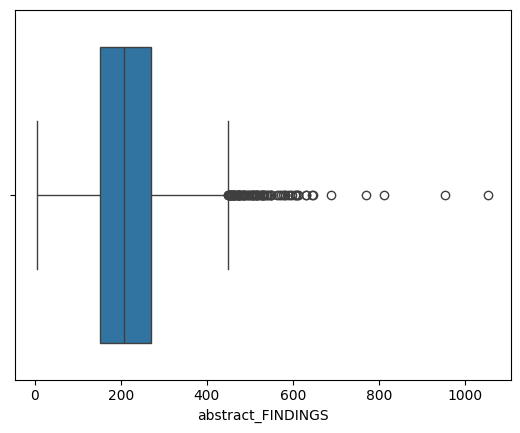

In [14]:
tmp = data.abstract_FINDINGS.str.len()
sns.boxplot(x=tmp)

<Axes: xlabel='abstract_IMPRESSION'>

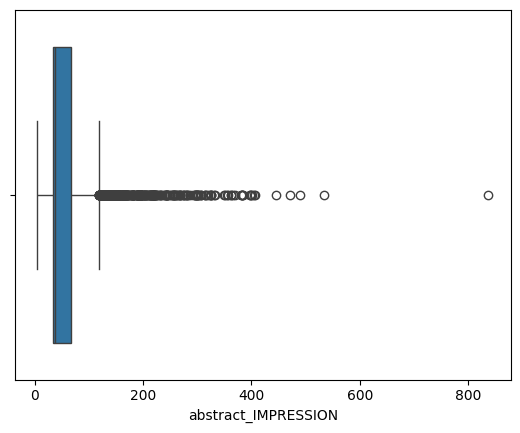

In [15]:
tmp = data.abstract_IMPRESSION.str.len()
sns.boxplot(x=tmp)

Nettoyage des données manquantes

In [16]:
def generate_wordcloud(column_name, title="Nuage de mots"):
    if column_name not in data.columns:
        print(f"La colonne '{column_name}' n'existe pas dans le DataFrame.")
        return
    text = " ".join(data[column_name].dropna())
    if not text.strip():
        print(f"La colonne '{column_name}' ne contient pas de texte non vide.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{title} - {column_name}\n")
    plt.show()


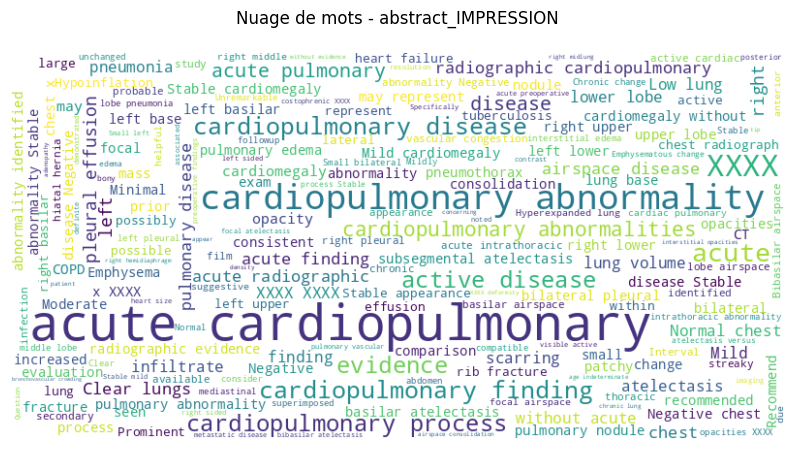

In [17]:
generate_wordcloud("abstract_IMPRESSION")

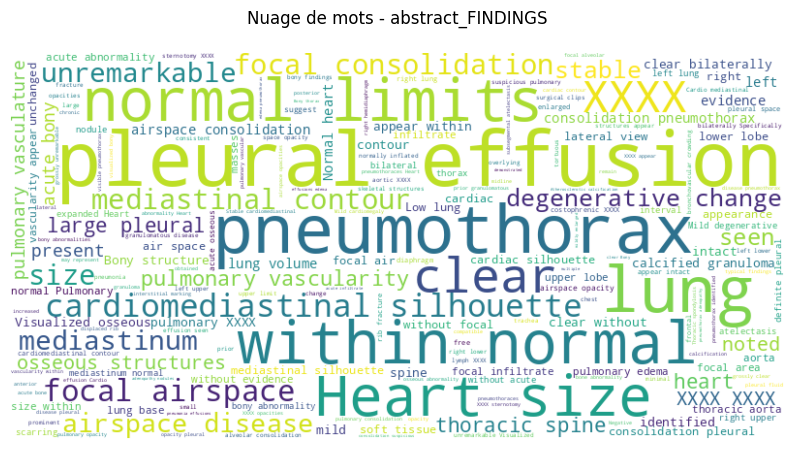

In [18]:
generate_wordcloud('abstract_FINDINGS')

In [19]:
data.to_csv("../../data/cleaned/data1_cleaned.csv",index=False)